In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('data_balita.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

# Display the summary of the dataset
data.info()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [4]:
# Encode categorical variables
data['Jenis Kelamin'] = data['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
data['Status Gizi'] = data['Status Gizi'].map({'stunted': 0, 'normal': 1, 'tinggi': 2, 'severely stunted': 3})

# Define features and target variable
X = data.drop(columns=['Status Gizi'])
y = data['Status Gizi']

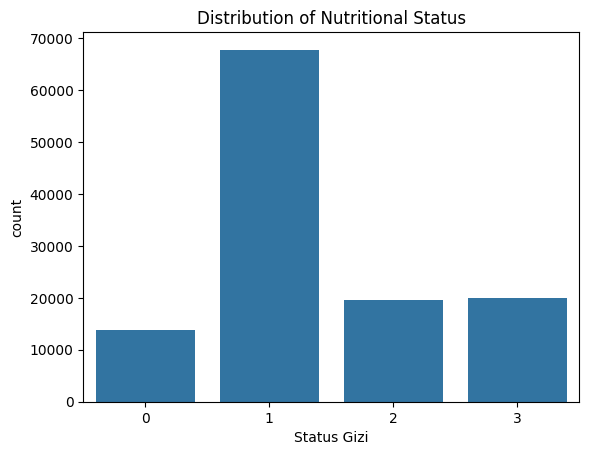

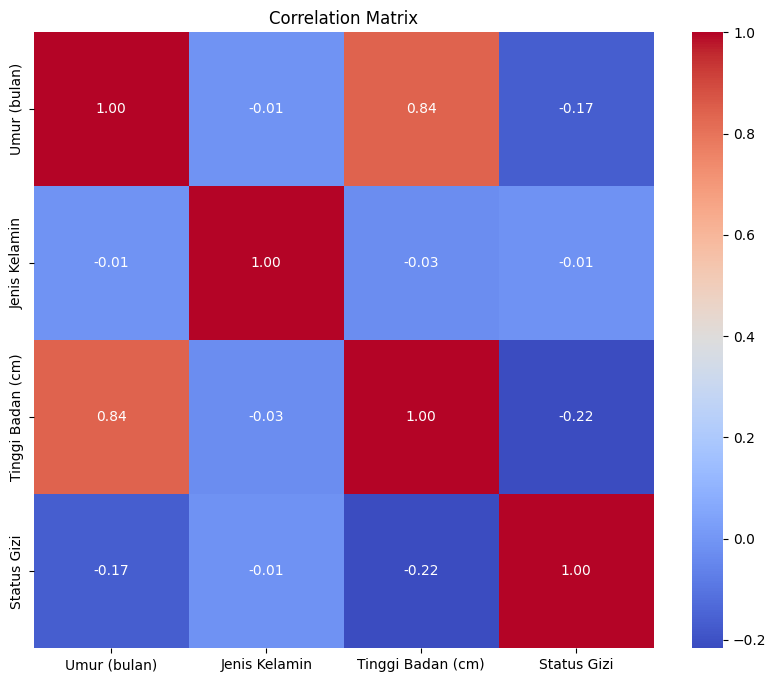

In [5]:
# Visualize the distribution of target variable
sns.countplot(x='Status Gizi', data=data)
plt.title('Distribution of Nutritional Status')
plt.show()

# Analyze the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2790
           1       1.00      1.00      1.00     13382
           2       1.00      1.00      1.00      3898
           3       1.00      1.00      1.00      4130

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200



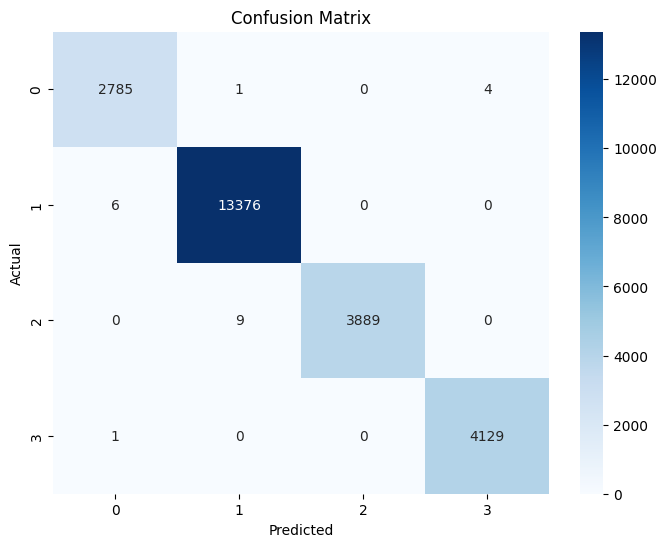

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
confusion_mtx = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Conclusion based on the evaluation
print("Model performance indicates...")

Model performance indicates...
